**Vamos experimentar agora o algoritmo Decision Tree?**

In [13]:
!pip -q install yellowbrick


[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier

In [15]:
import pickle
with open('restaurante.pkl', 'rb') as f:
  X_treino, X_teste, y_treino, y_teste = pickle.load(f)

In [16]:
modelo = DecisionTreeClassifier(criterion='entropy')
modelo.fit(X_treino, y_treino)

DecisionTreeClassifier(criterion='entropy')



> **Vamos testar o modelo?**



In [17]:
previsoes = modelo.predict(X_teste)

In [18]:
previsoes

array(['Nao', 'Nao', 'Nao'], dtype=object)



> **Será se o modelo acertou?**



In [19]:
y_teste

array(['Nao', 'Sim', 'Nao'], dtype=object)

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_teste,previsoes)

0.6666666666666666

In [21]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_teste, previsoes)

array([[2, 0],
       [1, 0]], dtype=int64)

0.6666666666666666

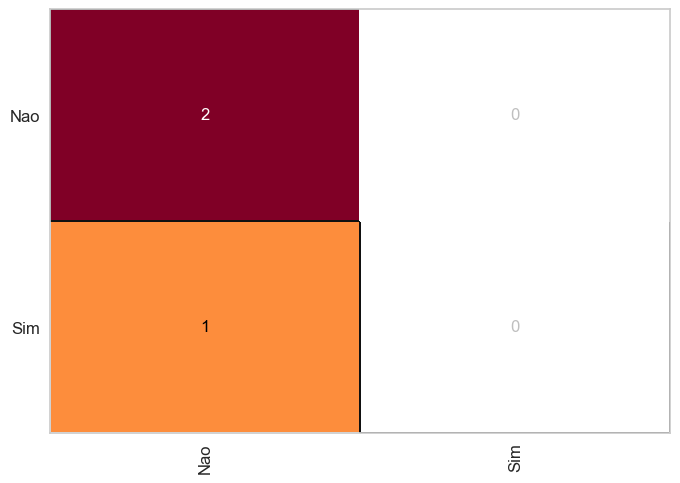

In [22]:
cm = ConfusionMatrix(modelo)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)

In [23]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

         Nao       0.67      1.00      0.80         2
         Sim       0.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


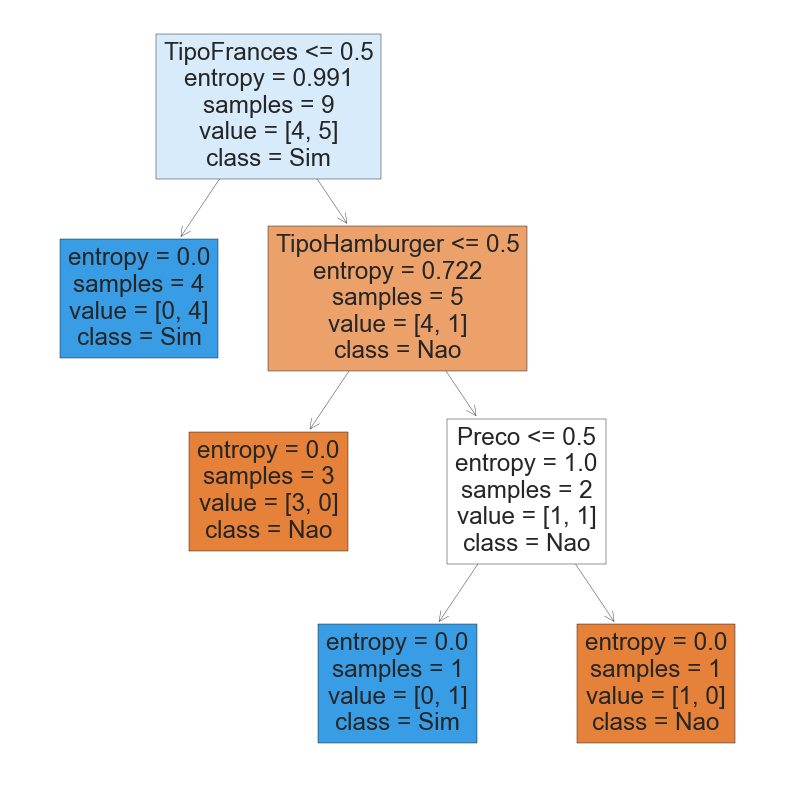

In [24]:
from sklearn import tree
previsores = ['Alternativo', 'Bar', 'Sex/Sab', 'Fome', 'Cliente', 'Preco', 'Chuva', 'Res', 
              'TipoFrances', 'TipoTailandes', 'TipoHamburger', 'TipoItaliano', 
              'Tempo']
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
tree.plot_tree(modelo, feature_names=previsores, class_names = modelo.classes_, filled=True);